[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


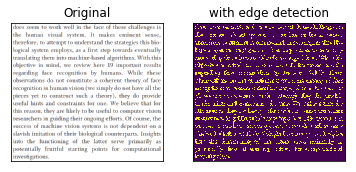

(600, 658)


In [114]:
#Mingxin Liu
#mxl592


import numpy as np
import scipy.io as sc
import cv2
import PIL 
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt

im = cv2.imread('../data/characters.png')
Img= Image.open('../data/characters.png','r')
img = Img.convert('L')
img_matrix = np.array(img)
#img_matrix = img.astype(np.uint8)
mat_matrix = sc.loadmat('../data/template-h.mat')
mat_matrix = mat_matrix['T']
#print(img_matrix[0])
print(mat_matrix[0])

kernel = np.ones((5,5),np.float32)/25
#print(kernel)
dst = cv2.filter2D(im,-1,kernel)
edges = cv2.Canny(dst, 100, 200)

plt.subplot(121),plt.imshow(dst),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges),plt.title('with edge detection')
plt.xticks([]), plt.yticks([])
plt.show()
plt.show
print(img_matrix.shape)
thresh = 15



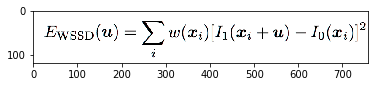

In [85]:
eq = cv2.imread('autocorrelation.png')
plt.imshow(eq)

Here is the auto-correlation function I'm going to implement in order to compare the image patch with the kernel. In this case, we are comparing the letter 'h' given from the template with the text file. 

In [112]:
col = img_matrix.shape[0] - mat_matrix.shape[0]
row = img_matrix.shape[1] - mat_matrix.shape[1]
#here minus the kernel from the original image and set to the correlation matrix
Corr_matrix = np.zeros((col, row))
threshold = 30
for i in range(col):
    for j in range(row):
        Corr_matrix[i][j] = np.sum((img_matrix [i:i+mat_matrix.shape[0], j:j+mat_matrix.shape[1]] /255- mat_matrix)** 2)
        #here is to apply the auto-correlation function of i and j from 1 to col and row. Basically comparing letter 
        #h kernel with patch taken from the original matrix. Dividing by 255 is becuase the pixel value in the original
        #image was 255, and the kernel has values of 1s and 0s. 
for i in range(col):
    for j in range(row):
        if Corr_matrix[i, j] < threshold:
      
                img_matrix[i:i + mat_matrix.shape[0], j + mat_matrix.shape[1]] = 0
                img_matrix[i + mat_matrix.shape[0], j:j + mat_matrix.shape[1]] = 0
              
                img_matrix[i:i + mat_matrix.shape[0], j] = 0
                img_matrix[i:i + mat_matrix.shape[0], j + mat_matrix.shape[1]] = 0
                img_matrix[i, j:j + mat_matrix.shape[1]] = 0

(600, 658)


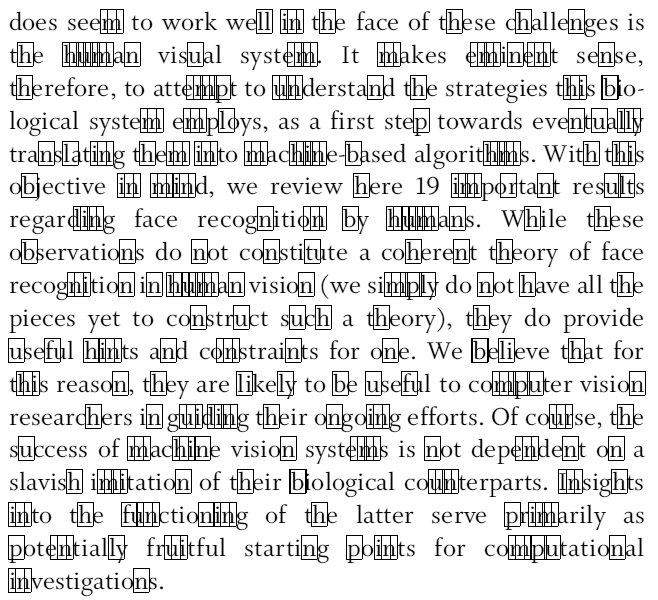

In [113]:
img = Image.fromarray(img_matrix, 'gray')
img.show()
#Here is when shreshold is 30. Since the threshold is too large, it does not only pick up hs but also ns and bs. 
#So the better solution in this case is to decrease the threshold. 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


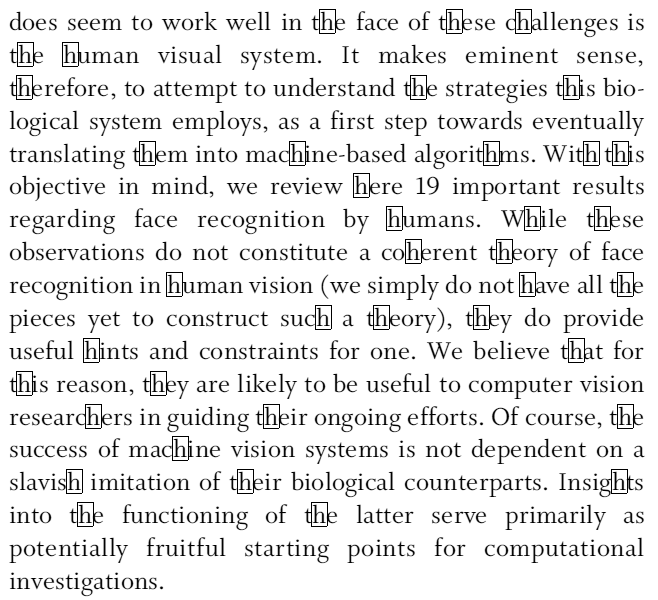

In [76]:
#when change threshold to 15